In [20]:
ra=83.633080
dec=22.014500
radius=15.
T1_utc='2003-03-15T23:27:40.0'
T2_utc='2018-03-16T00:03:15.0'
E1_keV=20.
E2_keV=40.
instrument='isgri'
product='isgri_image'
osa_version='OSA10.2'
host='analyse-staging-1.2.reproducible.online' #choice between analyse-staging-1.2.reproducible.online and www.astro.unige.ch/cdci/astrooda

In [21]:
from oda_api.api import DispatcherAPI
import os

In [22]:
if host=='analyse-staging-1.2.reproducible.online':
    try:
        token=raw_input() # token for restricted access server
    except:
        token=input() # token for restricted access server
else:
    token=''
cookies=dict(_oauth2_proxy=token)
disp=DispatcherAPI(host=host+'/dispatch-data',instrument='mock',cookies=cookies,protocol='https')

YW5kcmlpLm5lcm9ub3ZAZ21haWwuY29t|1562745568|66xgnRUCEdfh8dYxvz0MRtsSLZI=


In [ ]:
data=disp.get_product(
                      RA=ra,
                      DEC=dec,
                      radius=radius,
                      T1=T1_utc,
                      T2=T2_utc,
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      instrument=instrument,
                      product=product,
                      osa_version=osa_version)

waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


In [11]:
data.mosaic_image_0.show()
data.mosaic_image_0.write_fits_file('image.fits',overwrite=True)

------------------------------
name: mosaic_image
meta_data dict_keys(['src_name', 'instrument', 'product', 'query_parameters'])
number of data units 1
------------------------------
data uniti 0 ,name: ISGR-MOSA-IMA


In [18]:
from astropy.io import fits
from astropy.wcs import WCS
hdul = fits.open('image.fits')
wcs = WCS(hdul[0].header)
image = hdul[0].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


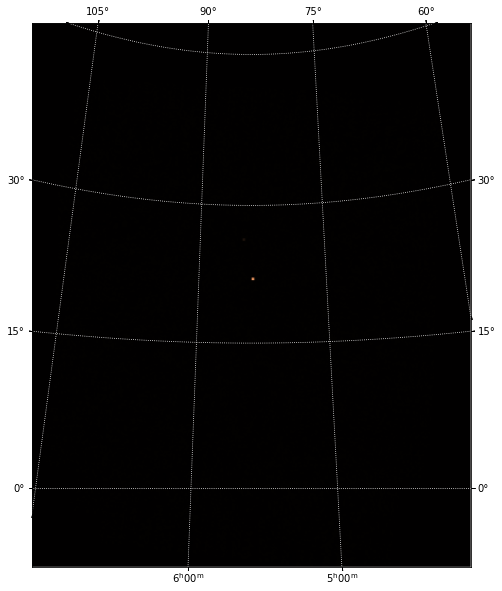

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
plt.imshow(image, cmap='copper')
plt.savefig('image.png')

In [14]:
image_png='image.png'
image_fits='image.fits'